In [1]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
import json
import re     
import os
import glob
from pandas import DataFrame
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Kkma
from konlpy.tag import Mecab
import numpy as np
import matplotlib as mpl
from wordcloud import WordCloud
#import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font', family = font_name)
mpl.rcParams['axes.unicode_minus'] = False
from tqdm import tqdm_notebook




### 날짜데이터 정제

In [5]:
df = [] #재귀 탐색
for name in glob.iglob('./**/*info.csv', recursive=True):
    df.append(name)
    print(name)
youtube_name =  []   
for i in df:
#     print(i[0:-9])
    print(i.split('\\')[1])
    youtube_name.append(i.split('\\')[1])
df    
# name_list = df['이름'].values
# name_list

.\Hyojin\Hyojin_info.csv
.\Joan Kim\Joan Kim_info.csv
.\lamuqe\lamuqe_info.csv
.\PONY Syndrome\PONY Syndrome_info.csv
.\RISABAE\RISABAE_info.csv
.\Sunny's\Sunny's_info.csv
.\개코의 오픈스튜디오\개코의 오픈스튜디오_info.csv
.\기우쌤\기우쌤_info.csv
.\다또아\다또아_info.csv
.\다영\다영_info.csv
.\도영이\도영이_info.csv
.\디렉터파이\디렉터파이_info.csv
.\디어제리\디어제리_info.csv
.\로즈하\로즈하_info.csv
.\리안\리안_info.csv
.\새벽\새벽_info.csv
.\샒의 삶\샒의 삶_info.csv
.\소윤\소윤_info.csv
.\슈스스\슈스스_info.csv
.\씬님\씬님_info.csv
.\아름송이\아름송이_info.csv
.\연두콩\연두콩_info.csv
.\유나\유나_info.csv
.\윤짜미\윤짜미_info.csv
.\젤라\젤라_info.csv
.\한별\한별_info.csv
.\헤이즐\헤이즐_info.csv
.\홀리\홀리_info.csv
.\회사원A\회사원A_info.csv
.\희주\희주_info.csv
Hyojin
Joan Kim
lamuqe
PONY Syndrome
RISABAE
Sunny's
개코의 오픈스튜디오
기우쌤
다또아
다영
도영이
디렉터파이
디어제리
로즈하
리안
새벽
샒의 삶
소윤
슈스스
씬님
아름송이
연두콩
유나
윤짜미
젤라
한별
헤이즐
홀리
회사원A
희주


['.\\Hyojin\\Hyojin_info.csv',
 '.\\Joan Kim\\Joan Kim_info.csv',
 '.\\lamuqe\\lamuqe_info.csv',
 '.\\PONY Syndrome\\PONY Syndrome_info.csv',
 '.\\RISABAE\\RISABAE_info.csv',
 ".\\Sunny's\\Sunny's_info.csv",
 '.\\개코의 오픈스튜디오\\개코의 오픈스튜디오_info.csv',
 '.\\기우쌤\\기우쌤_info.csv',
 '.\\다또아\\다또아_info.csv',
 '.\\다영\\다영_info.csv',
 '.\\도영이\\도영이_info.csv',
 '.\\디렉터파이\\디렉터파이_info.csv',
 '.\\디어제리\\디어제리_info.csv',
 '.\\로즈하\\로즈하_info.csv',
 '.\\리안\\리안_info.csv',
 '.\\새벽\\새벽_info.csv',
 '.\\샒의 삶\\샒의 삶_info.csv',
 '.\\소윤\\소윤_info.csv',
 '.\\슈스스\\슈스스_info.csv',
 '.\\씬님\\씬님_info.csv',
 '.\\아름송이\\아름송이_info.csv',
 '.\\연두콩\\연두콩_info.csv',
 '.\\유나\\유나_info.csv',
 '.\\윤짜미\\윤짜미_info.csv',
 '.\\젤라\\젤라_info.csv',
 '.\\한별\\한별_info.csv',
 '.\\헤이즐\\헤이즐_info.csv',
 '.\\홀리\\홀리_info.csv',
 '.\\회사원A\\회사원A_info.csv',
 '.\\희주\\희주_info.csv']

In [7]:
## 댓글 파일이 있는 유튜버만 만들어주세요.
df = pd.read_csv('뷰티리스트.csv',encoding='cp949')
name_list = df['이름'].values
name_list


for name in name_list:
# 각 이름에 맞는 info 파일 불러와서 데이터프레임에 저장
    df = pd.read_csv(f'{name}/{name}_info.csv')
    
    # column에 Unnames가 새로 생겨서 column 다시 지정해줌
    df.columns = ['', 'name', 'thumbnail', 'view', 'previous_time',
              'video_url', 'start_date', 'comment', 'likes_num', 'unlikes_num', 'time_duration']
    
    # start_date를 리스트로
    date_list = list(df['start_date'])
    
    # 날짜만 뽑아 오는 정규표현식
    p = re.compile("\d{4}[.]\s\d+[.]\s\d+[.]")
    
    # 정규표현식에 맞는 날짜 저장할 리스트
    new_date = []
    
    # 날짜 저장
    for i in range(len(date_list)):
        new_date.append(re.findall(p, date_list[i]))
    
    # 데이터프레임의 start_date 컬럼에 값 저장
    df.loc[:, 'start_date'] = new_date
    
    # info파일 덮어쓰기
    df.to_csv(f'{name}/{name}_info.csv', index = False, encoding = 'utf-8-sig')
    
    print(f'{name} 저장 완료')
    
for name in name_list:
    youtube_channel= name

Hyojin 저장 완료
lamuqe 저장 완료
PONY Syndrome 저장 완료
RISABAE 저장 완료
개코의 오픈스튜디오 저장 완료
디렉터파이 저장 완료
로즈하 저장 완료
슈스스 저장 완료
씬님 저장 완료
아름송이 저장 완료
연두콩 저장 완료
유나 저장 완료
윤짜미 저장 완료
젤라 저장 완료
한별 저장 완료
헤이즐 저장 완료
회사원A 저장 완료
희주 저장 완료


### 불용어사전 불러오기 및 수정

In [8]:
f= pd.read_csv('불용어사전(한글자).csv',encoding='cp949')
stop_list = list(f)
Unnamed = 'Unnamed: '+ str(len(stop_list)-1)
stop_list.extend(['진짜'])
stop_words = set(stop_list)

stop_words.remove(Unnamed)

# stop_words

# 단어 새로 추가했을 때에 사용!!!
f = open('불용어사전(한글자).csv','w')
for i in stop_words:
    f.write(i+',')
f.close()


### 인코딩 에러뜰 때 순차로 실행('euc-kr' or 'cp949')

In [ ]:
# # #인코딩 에러뜰때만 실행
# youtube_channel = input("유투브 채널 이름 입력하시오.")
# date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv',encoding='cp949')

In [ ]:
# # #인코딩 에러뜰때만 실행


# date.to_csv(youtube_channel+'/'+youtube_channel+'_info.csv',encoding='utf-8-sig',index=False)

## 텍스트 마이닝 시작

현재 유튜버 : Hyojin
2020. 5. 30.
2020. 5. 29.
2020. 5. 23.
2020. 5. 19.
2020. 5. 14.
2020. 5. 11.
2020. 5. 5.
2020. 5. 4.
2020. 4. 27.
2020. 4. 24.
2020. 4. 20.
2020. 4. 10.
2020. 4. 9.
2020. 4. 2.
2020. 4. 1.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:27: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


C:\Users\acorn\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')



Hyojin date 컬럼 추가 완료
Hyojintoken_result 저장 완료


C:\Users\acorn\anaconda3\lib\site-packages\ipykernel_launcher.py:138: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



{'언니': 863, '효진': 384, '영상': 367, '투쿨': 170, '오늘': 157, '보고': 154, '화장': 138, '사랑': 138, '메이크업': 138, '항상': 128, '같아요': 111, '파파': 109, '쿠션': 104, '사람': 98, '정말': 91, '제품': 88, '생각': 84, '이벤트': 83, '쿨': 82, '쉐딩': 82, '포스': 80, '말': 77, '피부': 73, '정보': 72, '개': 70, '좋아요': 70, '이번': 69, '아니': 63, '조효진': 57, '좋은': 56}


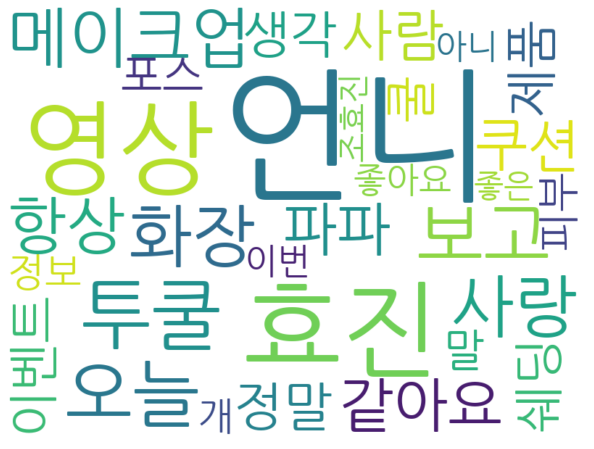

Hyojinword cloud 저장 완료
현재 유튜버 : lamuqe
2020. 5. 29.
2020. 5. 23.
2020. 5. 17.
2020. 5. 10.
2020. 5. 1.
2020. 4. 25.
2020. 4. 18.
2020. 4. 11.
2020. 4. 7.
0
1
2
3
4
5
6
7
8



lamuqe date 컬럼 추가 완료
lamuqetoken_result 저장 완료



{'언니': 376, '영상': 165, '라뮤끄님': 127, '메이크업': 104, '색': 104, '립스틱': 88, '오늘': 74, '뮤': 72, '같아요': 70, '느낌': 69, '옷': 69, '톤': 69, '보고': 66, '정보': 64, '컬러': 63, '대박': 58, '립': 57, '사람': 45, '뮤트': 43, '큐영': 42, '완전': 41, '정말': 39, '피부': 39, '예뻐요': 39, '토리': 36, '발색': 35, '조합': 35, '사랑': 34, '생각': 34, '개': 33}


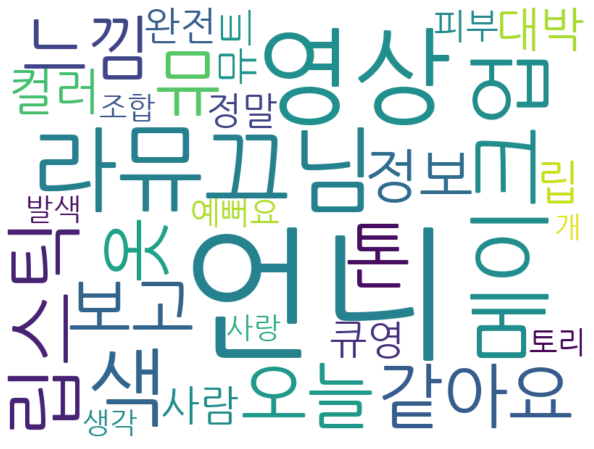

lamuqeword cloud 저장 완료
현재 유튜버 : PONY Syndrome
2020. 5. 25.
2020. 5. 13.
2020. 4. 26.
2020. 4. 17.
0
1
2
3



PONY Syndrome date 컬럼 추가 완료
PONY Syndrometoken_result 저장 완료



{'언니': 108, '포니': 81, '메이크업': 49, '영상': 43, '노래': 37, '화장': 22, '사랑': 22, '피부': 21, '얼굴': 19, '정말': 15, '사람': 14, '마스크': 14, '좋아요': 13, '느낌': 13, '오늘': 13, '보고': 12, '헤어': 12, '그냥': 11, '브이': 11, '로그': 11, '이런': 10, '예뻐요': 10, '라이브': 9, '날': 9, '정보': 9, '항상': 9, '어떻게': 9, '목소리': 8, '분위기': 8, '혹시': 8}


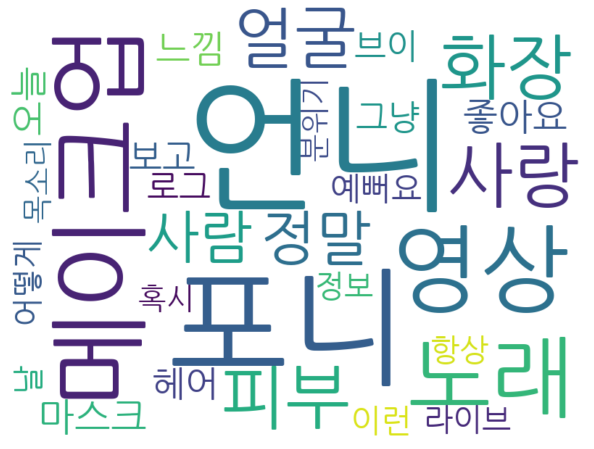

PONY Syndromeword cloud 저장 완료
현재 유튜버 : RISABAE
2020. 5. 27.
2020. 5. 20.
2020. 5. 14.
2020. 5. 7.
2020. 4. 29.
2020. 4. 22.
2020. 4. 17.
2020. 4. 14.
2020. 4. 8.
2020. 4. 2.
0
1
2
3
4
5
6
7
8
9



RISABAE date 컬럼 추가 완료
RISABAEtoken_result 저장 완료



{'언니': 454, '사배': 283, '메이크업': 227, '영상': 171, '오늘': 99, '같아요': 74, '보고': 63, '화장': 62, '사랑': 61, '커버': 60, '파우더': 59, '이사배': 57, '집': 55, '완전': 52, '느낌': 49, '예뻐요': 47, '얼굴': 45, '정말': 44, '썸네일': 40, '하이': 39, '어떻게': 39, '대박': 39, '틴': 38, '민니': 38, '베이직': 37, '최고': 36, '좋아요': 34, '피부': 33, '추천': 32, '같은': 32}


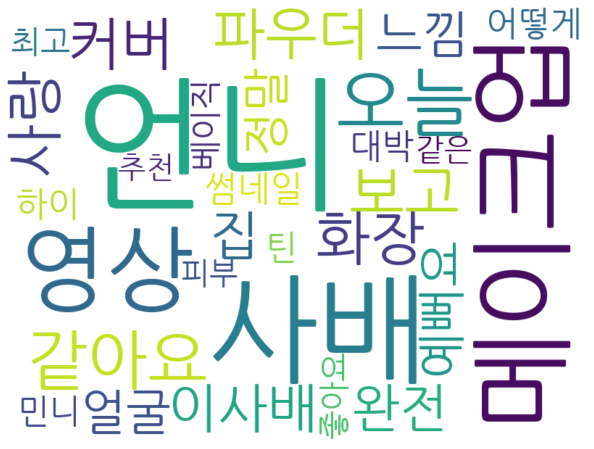

RISABAEword cloud 저장 완료
현재 유튜버 : 개코의 오픈스튜디오
2020. 5. 30.
2020. 5. 4.
2020. 4. 28.
2020. 4. 10.
0
1
2
3



개코의 오픈스튜디오 date 컬럼 추가 완료
개코의 오픈스튜디오token_result 저장 완료



{'렌즈': 108, '언니': 100, '영상': 82, '개코': 78, '눈': 67, '쿨톤': 53, '좋은': 43, '롬앤': 40, '화장': 36, '박스': 36, '구매': 32, '생각': 28, '품절': 27, '메이크업': 27, '꼭': 26, '그레이': 26, '구성': 25, '롬': 23, '사랑': 23, '제품': 22, '사람': 22, '하나': 22, '정말': 21, '결제': 21, '제발': 20, '추천': 20, '같아요': 19, '보고': 19, '완전': 19, '섀도우': 19}


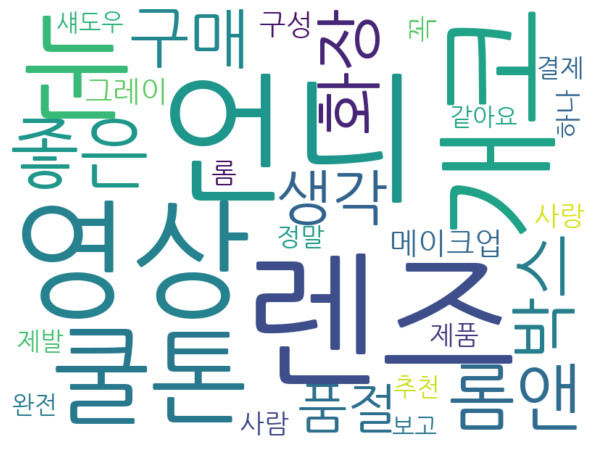

개코의 오픈스튜디오word cloud 저장 완료
현재 유튜버 : 디렉터파이
2020. 4. 2.
0



디렉터파이 date 컬럼 추가 완료
디렉터파이token_result 저장 완료



{'패드': 106, '영상': 47, '디파': 47, '토너': 24, '피부': 21, '제품': 21, '추천': 19, '사용': 18, '성분': 17, '항상': 17, '파이': 16, '좋은': 15, '템': 14, '오늘': 13, '알': 12, '여드름': 12, '보고': 12, '바디': 11, '디렉터': 11, '각질': 10, '꼭': 10, '고민': 9, '일리': 8, '자극': 8, '엑스': 8, '진정': 8, '그린': 8, '화장품': 8, '매일': 7, '제거': 7}


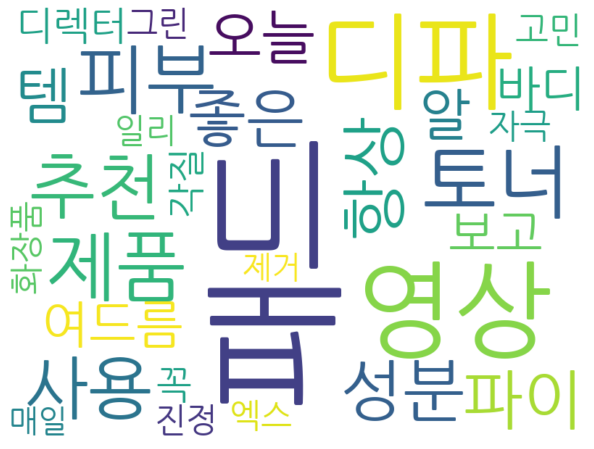

디렉터파이word cloud 저장 완료
현재 유튜버 : 로즈하
2020. 5. 23.
2020. 5. 7.
2020. 4. 26.
2020. 4. 15.
2020. 4. 8.
2020. 4. 7.
0
1
2
3
4
5



로즈하 date 컬럼 추가 완료
로즈하token_result 저장 완료



{'언니': 612, '영상': 344, '오늘': 118, '브이': 111, '로그': 108, '사랑': 104, '옷': 96, '생일': 82, '이벤트': 75, '보고': 68, '참여': 67, '추억': 65, '항상': 63, '박스': 62, '축하': 55, '완전': 52, '힐링': 51, '같아요': 48, '사람': 47, '로즈하': 47, '정말': 46, '희망': 43, '공주': 41, '옷장': 41, '댓글': 39, '하나': 35, '여행': 35, '좋아요': 35, '장미': 35, '로즈마리': 34}


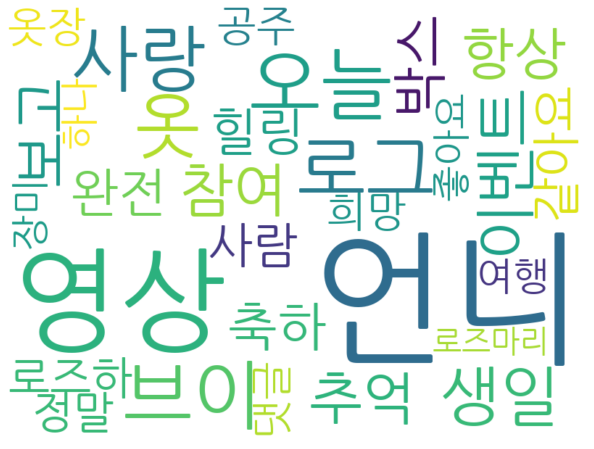

로즈하word cloud 저장 완료
현재 유튜버 : 슈스스
2020. 6. 2.
2020. 5. 28.
2020. 5. 26.
2020. 5. 21.
2020. 5. 14.
2020. 5. 12.
2020. 5. 5.
2020. 4. 30.
2020. 4. 26.
2020. 4. 23.
2020. 4. 16.
2020. 4. 9.
2020. 4. 7.
2020. 4. 2.
0
1
2
3
4
5
6
7
8
9
10
11
12
13



슈스스 date 컬럼 추가 완료
슈스스token_result 저장 완료



{'언니': 539, '슈스스': 264, '옷': 182, '영상': 182, '브랜드': 130, '오늘': 119, '같아요': 113, '보고': 102, '광고': 102, '정말': 97, '남자': 97, '사랑': 91, '자켓': 89, '가방': 84, '슈스': 81, '스님': 80, '베이비': 79, '좋은': 79, '완전': 76, '문초': 74, '역시': 72, '누나': 72, '생각': 71, '이번': 71, '지갑': 70, '스타일': 69, '소개': 69, '있는': 68, '하나': 67, '디자인': 67}


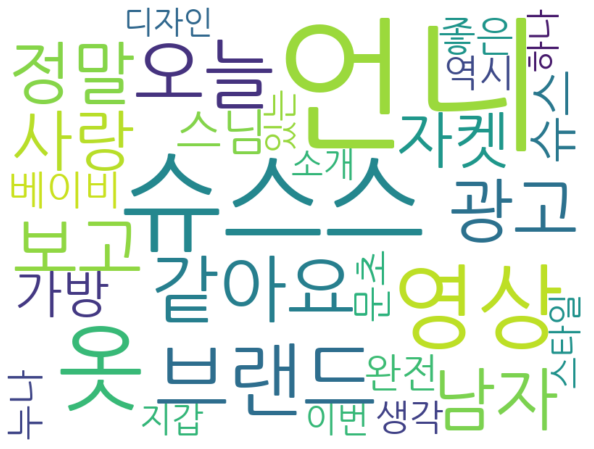

슈스스word cloud 저장 완료
현재 유튜버 : 씬님
2020. 5. 29.
2020. 5. 26.
2020. 5. 17.
2020. 5. 11.
2020. 4. 29.
2020. 4. 28.
2020. 4. 25.
2020. 4. 21.
2020. 4. 16.
2020. 4. 6.
0
1
2
3
4
5
6
7
8
9



씬님 date 컬럼 추가 완료
씬님token_result 저장 완료



{'언니': 422, '씬님': 284, '영상': 177, '속옷': 150, '뷰티': 97, '보고': 84, '메이크업': 76, '수영복': 70, '유튜버': 66, '유': 65, '리뷰': 62, '같아요': 54, '브랜드': 52, '사랑': 49, '화장': 48, '좋아요': 45, '오늘': 44, '팔레트': 43, '아니': 42, '릴카님': 41, '제품': 39, '씬': 38, '튜버': 36, '개': 34, '처음': 34, '화장품': 34, '썸네일': 33, '등산': 32, '말': 31, '제목': 31}


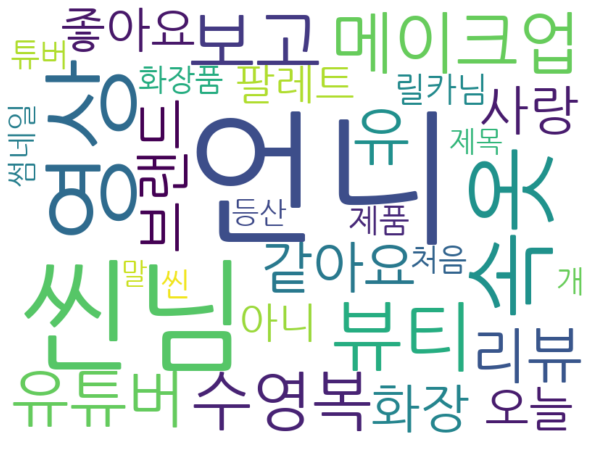

씬님word cloud 저장 완료
현재 유튜버 : 아름송이
2020. 5. 29.
2020. 5. 24.
2020. 5. 17.
2020. 5. 6.
2020. 4. 26.
2020. 4. 16.
2020. 4. 10.
2020. 4. 3.
0
1
2
3
4
5
6
7



아름송이 date 컬럼 추가 완료
아름송이token_result 저장 완료



{'언니': 298, '영상': 86, '송이': 77, '흑발': 62, '메이크업': 61, '오늘': 49, '이뻐요': 38, '같아요': 37, '아름': 35, '예뻐요': 33, '사랑': 31, '정보': 31, '항상': 30, '화장': 30, '브랜드': 29, '샤넬': 26, '보고': 25, '완전': 22, '머리': 22, '브이': 22, '로그': 22, '느낌': 19, '좋아요': 18, '뭔가': 18, '소리': 17, '정말': 16, '존예': 16, '이번': 16, '개': 15, '예쁘다': 15}


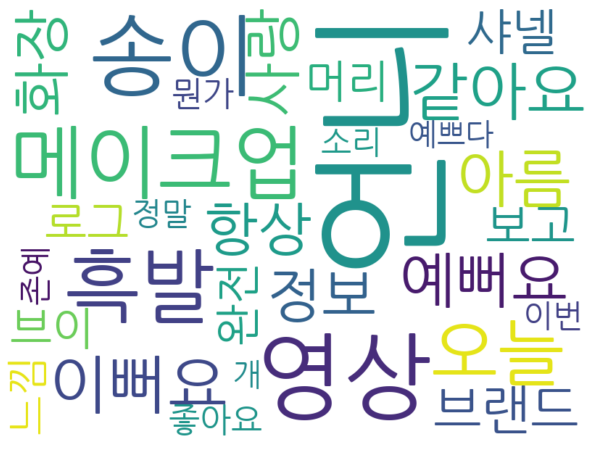

아름송이word cloud 저장 완료
현재 유튜버 : 연두콩
2020. 5. 29.
2020. 5. 24.
2020. 5. 22.
2020. 5. 17.
2020. 4. 21.
2020. 4. 14.
2020. 4. 10.
2020. 4. 9.
2020. 4. 3.
2020. 4. 1.
0
1
2
3
4
5
6
7
8
9



연두콩 date 컬럼 추가 완료
연두콩token_result 저장 완료



{'언니': 631, '콩': 345, '영상': 247, '유': 192, '오늘': 158, '향수': 124, '연우': 111, '베개': 110, '이름': 107, '추천': 102, '보고': 77, '사랑': 67, '샴푸': 67, '다이어트': 66, '같아요': 59, '좋은': 58, '제품': 57, '옷': 55, '어유': 55, '템': 55, '정말': 54, '마켓': 49, '항상': 47, '아니': 46, '요즘': 46, '베리': 43, '귀여워요': 43, '예뻐요': 42, '취향': 41, '반지': 40}


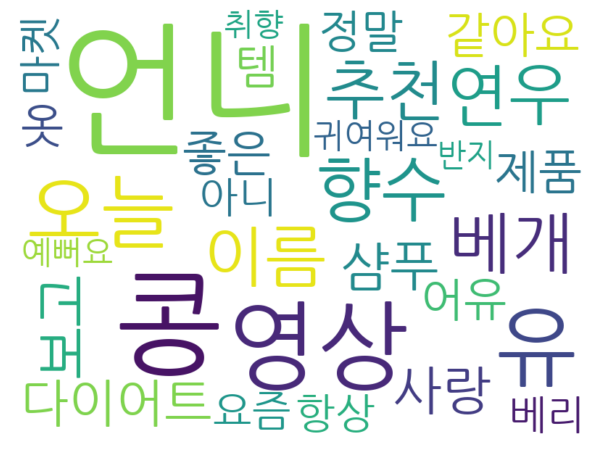

연두콩word cloud 저장 완료
현재 유튜버 : 유나
2020. 5. 23.
2020. 5. 16.
2020. 5. 2.
2020. 4. 18.
2020. 4. 11.
0
1
2
3
4



유나 date 컬럼 추가 완료
유나token_result 저장 완료



{'코로나': 150, '유나': 120, '영상': 111, '피부': 102, '마스크': 66, '잡티': 62, '보고': 54, '좋은': 50, '제품': 48, '기미': 48, '정말': 43, '언니': 43, '때문': 43, '같아요': 41, '생각': 39, '있어요': 38, '집': 37, '요즘': 37, '꼭': 36, '있는': 31, '추천': 30, '주근깨': 30, '플라스틱': 29, '여행': 29, '항상': 28, '얼굴': 28, '입니다': 26, '사람': 26, '사용': 24, '비타민': 24}


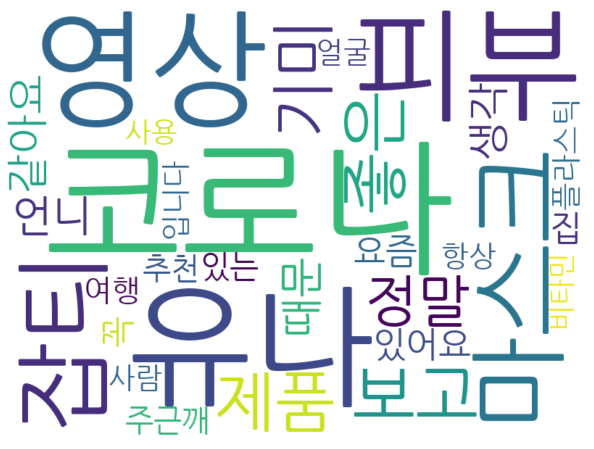

유나word cloud 저장 완료
현재 유튜버 : 윤짜미
2020. 5. 22.
2020. 5. 15.
2020. 5. 8.
2020. 5. 4.
2020. 5. 2.
2020. 4. 24.
0
1
2
3
4
5



윤짜미 date 컬럼 추가 완료
윤짜미token_result 저장 완료



{'언니': 577, '영상': 194, '집': 82, '손톱': 82, '사랑': 71, '빵빵': 71, '오늘': 67, '대박': 57, '텐션': 53, '생일': 52, '축하': 52, '짜미': 49, '쨔미언': 48, '옷': 48, '쨔미님': 43, '같아요': 40, '코디': 40, '인형': 40, '보고': 39, '쨔미': 39, '셀럽': 39, '네일': 38, '이뻐요': 38, '예뻐요': 38, '완전': 35, '호': 32, '항상': 32, '구관': 31, '천재': 29, '생각': 27}


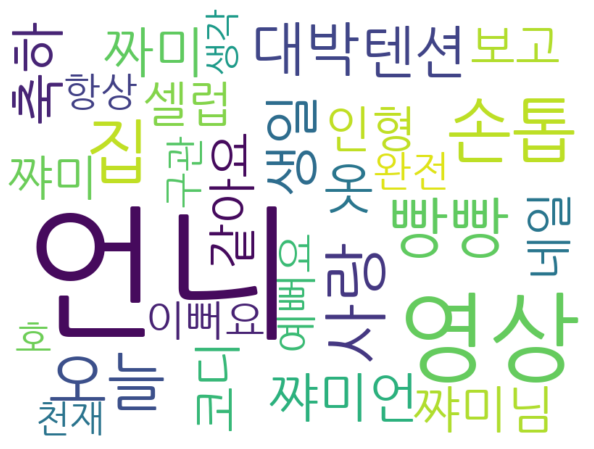

윤짜미word cloud 저장 완료
현재 유튜버 : 젤라
2020. 5. 29.
2020. 5. 21.
2020. 5. 18.
2020. 5. 17.
2020. 4. 30.
2020. 4. 26.
2020. 4. 24.
2020. 4. 19.
2020. 4. 8.
2020. 4. 6.
2020. 4. 2.
2020. 4. 1.
0
1
2
3
4
5
6
7
8
9
10
11



젤라 date 컬럼 추가 완료
젤라token_result 저장 완료



{'언니': 471, '젤라': 459, '영상': 167, '엄마': 124, '사랑': 91, '같아요': 84, '머리': 81, '사람': 77, '정말': 73, '메이크업': 72, '보고': 68, '항상': 67, '오늘': 62, '춤': 59, '구매': 58, '샴푸': 56, '생각': 51, '완전': 50, '말': 50, '화장': 45, '그냥': 41, '이뻐요': 40, '얼굴': 37, '애기': 37, '좋은': 36, '전남친': 36, '노래': 35, '좋아요': 35, '느낌': 35, '두피': 35}


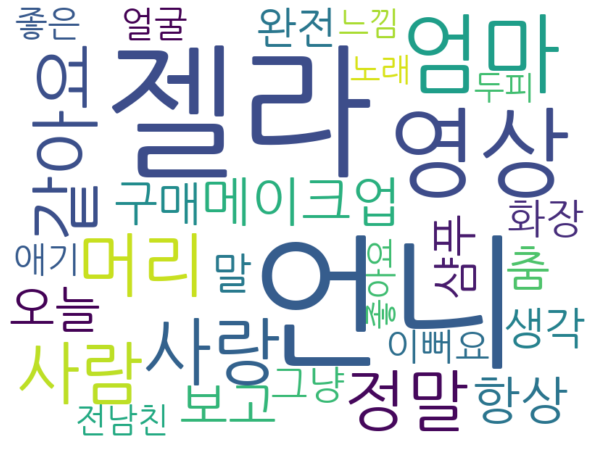

젤라word cloud 저장 완료
현재 유튜버 : 한별
2020. 5. 29.
2020. 5. 16.
2020. 4. 26.
2020. 4. 17.
0
1
2
3



한별 date 컬럼 추가 완료
한별token_result 저장 완료



{'언니': 287, '영상': 238, '한별': 180, '집': 70, '느낌': 58, '인테리어': 55, '오늘': 51, '좋아요': 51, '같아요': 49, '사랑': 45, '항상': 45, '보고': 40, '영화': 37, '생각': 37, '데님': 35, '옷': 32, '스페인어': 31, '취향': 30, '말': 29, '완전': 28, '같은': 27, '사람': 27, '광고': 25, '예뻐요': 25, '정보': 25, '정말': 24, '이런': 23, '최고': 23, '하나': 23, '이번': 21}


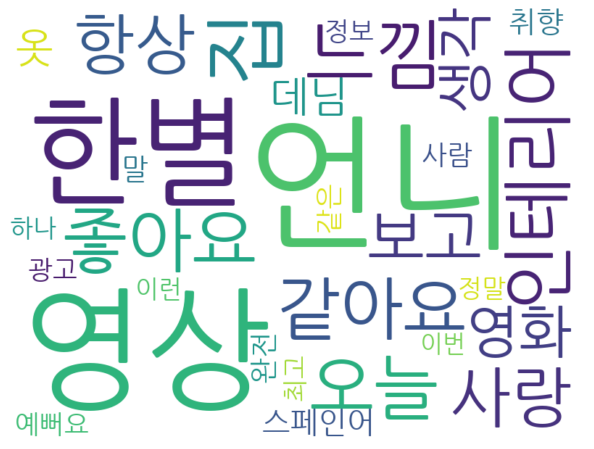

한별word cloud 저장 완료
현재 유튜버 : 헤이즐
2020. 5. 30.
2020. 5. 23.
2020. 5. 16.
2020. 5. 9.
2020. 5. 2.
2020. 4. 25.
2020. 4. 20.
2020. 4. 18.
2020. 4. 11.
2020. 4. 4.
0
1
2
3
4
5
6
7
8
9



헤이즐 date 컬럼 추가 완료
헤이즐token_result 저장 완료



{'언니': 1140, '영상': 538, '즐': 418, '헤': 270, '헤이즐': 183, '그림': 182, '오늘': 179, '힐링': 170, '사랑': 162, '같아요': 139, '정말': 133, '작품': 122, '꼭': 120, '앞머리': 116, '항상': 112, '보고': 111, '완전': 93, '전시회': 88, '미술': 76, '좋아요': 75, '예뻐요': 71, '이뻐요': 69, '생각': 65, '모습': 63, '화실': 62, '응원': 62, '사람': 62, '느낌': 61, '메이크업': 61, '요즘': 59}


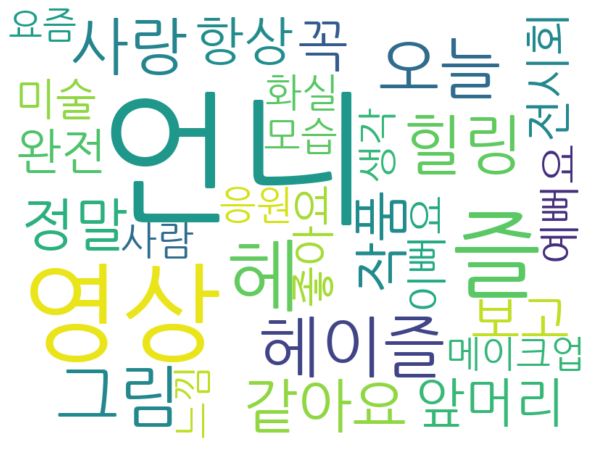

헤이즐word cloud 저장 완료
현재 유튜버 : 회사원A
2020. 5. 30.
2020. 5. 29.
2020. 5. 22.
2020. 5. 16.
2020. 5. 15.
2020. 5. 9.
2020. 5. 2.
2020. 4. 24.
2020. 4. 18.
2020. 4. 11.
2020. 4. 4.
2020. 4. 1.
2020. 4. 1.
0
1
2
3
4
5
6
7
8
9
10
11
12



회사원A date 컬럼 추가 완료
회사원Atoken_result 저장 완료



{'회사원': 340, '언니': 338, '영상': 273, '피부': 259, '보고': 216, '설화수': 156, '머리': 110, '제품': 98, '체': 92, '파운데이션': 92, '정말': 90, '꼭': 88, '같아요': 86, '좋은': 84, '옷': 78, '요즘': 74, '급식': 73, '화장': 72, '오늘': 72, '한번': 71, '메이크업': 69, '느낌': 66, '사람': 64, '에센스': 64, '바이옴': 61, '생각': 60, '아니': 58, '얼굴': 57, '이번': 55, '항상': 54}


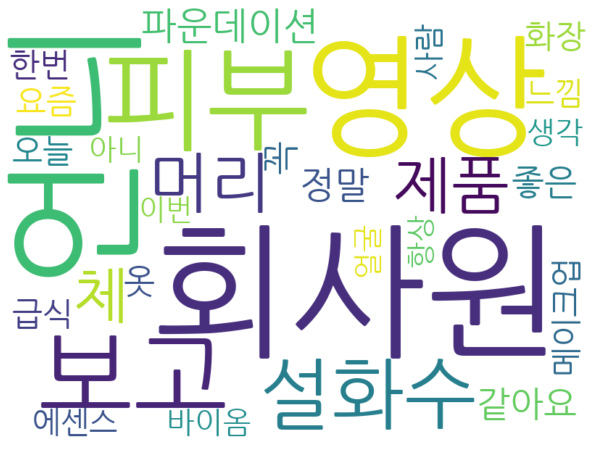

회사원Aword cloud 저장 완료
현재 유튜버 : 희주
2020. 5. 29.
2020. 5. 22.
2020. 5. 18.
2020. 5. 14.
2020. 5. 8.
2020. 4. 29.
2020. 4. 24.
2020. 4. 18.
2020. 4. 10.
2020. 4. 2.
0
1
2
3
4
5
6
7
8
9



희주 date 컬럼 추가 완료
희주token_result 저장 완료



{'언니': 396, '영상': 155, '주님': 117, '희': 114, '사랑': 77, '정보': 67, '오늘': 64, '같아요': 49, '예뻐요': 48, '메이크업': 45, '피부': 43, '희주': 40, '당신': 39, '보고': 37, '립': 35, '정말': 33, '렌즈': 33, '예뻐': 33, '머리': 32, '항상': 31, '찰떡': 31, '제품': 27, '혹시': 27, '어디': 27, '스페인어': 26, '완전': 25, '옷': 25, '로그': 25, '뭔가': 24, '브이': 24}


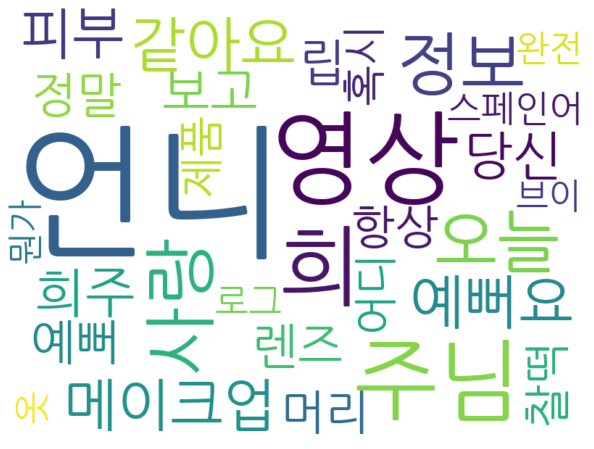

희주word cloud 저장 완료


In [9]:
# 파일 합치는 곳 (폴더 제목 입력)
# 댓글에 날짜 추가!!!
for youtube_channel in name_list:
#     youtube_channel = input("유투브 채널 이름 입력하시오.")
    youtube_channel = youtube_channel
    print("현재 유튜버 : " + youtube_channel)
    if youtube_channel :
#     date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv')
        date = pd.read_csv(youtube_channel+'/'+youtube_channel+'_info.csv')
        ccc = date[date['start_date'] >= '2020. 4. 1']['start_date']

    ccc
    # pd.read_csv('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_[i+1].csv')

    for i in ccc:
         print(i)
    #     a = pd.read_csv(('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))['youtube'].values
    #     np.append(comment_date, a)     up_date = pd.read_csv(('./Beauty/'+youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))
    #     comment_date.append(up_date)
    comment_date = []
    for i in range(len(ccc)):
         print(i)
         a = pd.read_csv((youtube_channel+'/comment/'+youtube_channel+'_comment_{}.csv').format(i+1))
         comment_date.append(a)

#     comment_date[0]
    for i in tqdm_notebook(range(len(ccc))):

        df = comment_date[i]
        you_id = df['youtube_id'].values
        co_id = df['comment'].values
        likes = df['like_num'].values
        start_date = ccc[i]
        comment_final = pd.DataFrame(data = {'닉네임':you_id,
                                    '댓글':co_id,
                                    '좋아요수':likes,
                                    '날짜':start_date})
        comment_final.to_csv(youtube_channel+'/comment/'+ youtube_channel +'_comment_date{}.csv'.format(i+1),
                            encoding='utf-8-sig',index=False)    

    print(youtube_channel + ' date 컬럼 추가 완료')

    path =  str(youtube_channel) + "/comment"
    path2 = str(youtube_channel) + '/result.csv'
    arg_youtube = str(youtube_channel) + "*"


    allFile_list = glob.glob(os.path.join(path,arg_youtube))
    #print(allFile_list)
    allData = []
    for file in allFile_list:
        if 'date' in file:
            # print(file)
            df = pd.read_csv(file)
            allData.append(df)

    dataCombine = pd.concat(allData,axis =0, ignore_index = True)

    dataCombine.to_csv(path2, index = False, encoding = 'utf-8-sig')
    cdPath = str(youtube_channel) + '/result.csv'
    comment_data = pd.read_csv(cdPath)
    comment_data ##제대로 출력되는지 확인
    com_list = list(comment_data['댓글'])   ##제대로 출력되는지 확인
    # com_list   ##제대로 출력되는지 확인

    # ### 추출된 단어가 무슨 형태인지 파악
    # # for sentence in com_list:
    # #     morph = twitter.pos(sentence)
    # #     sentences_tag.append(morph)

    # 추출 단어들 저장

    def get_noun(comment_txt):

        twitter = Twitter()
        noun_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Noun']:

                    if word not in stop_words:
                        noun_list.append(word)

        return noun_list

    def get_adj(comment_txt):

        twitter = Twitter()
        adj_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Adjective']:
                    if word not in stop_words:
                        adj_list.append(word)

        return adj_list

    def get_verb(comment_txt):

        twitter = Twitter()
        verb_list = []

        if len(comment_txt) > 0:
            twitter = twitter.pos(comment_txt, norm = True, stem = True)
            for word, tag in twitter:
                if tag in ['Verb']:
                    if word not in stop_words:
                        verb_list.append(word)
        return verb_list

    comment_list = []
    for i in range(len(comment_data)):
        comment_list.append(comment_data['댓글'].iloc[i])

    comment_result = []

    for i in comment_list:
        comment_result.append(i)

    comment_result = pd.DataFrame(comment_result, columns=["comment"])

    #cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # 해당폴더에 자동저장
    comment_result['noun'] = comment_result['comment'].apply(lambda x: get_noun(x))
    comment_result['adj'] = comment_result['comment'].apply(lambda x: get_adj(x))
    comment_result['verb'] = comment_result['comment'].apply(lambda x: get_verb(x))

    comment_result.to_csv(youtube_channel +'/{}token_result.csv'.format(youtube_channel),
                                                                       index = False, encoding = 'utf-8-sig')
    print(youtube_channel + 'token_result 저장 완료')

    twitter = Twitter()

    sentences_tag = []
    for sentence in tqdm_notebook(com_list):
         morph = twitter.pos(sentence)
         sentences_tag.append(morph)

    stop_words
    for sentence in comment_data:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
    #     print(morph)
    #     print('-'*30)

    # print(sentences_tag)
    # print(len(sentences_tag))
    # print('\n'*3)

    noun_adj_list = []
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun','Adjective','verb']:
                if word not in stop_words:
                    noun_adj_list.append(word)            

    counts = Counter(noun_adj_list)
    select_data = counts.most_common(30)


    wc = WordCloud(font_path='NanumGothic.ttf',max_font_size=200,background_color='white' ,width=800, height=600)

    print(dict(select_data))
    cloud = wc.generate_from_frequencies(dict(select_data))
    plt.figure(figsize=(12, 8))
    plt.axis('off')
    plt.imshow(cloud,interpolation='bilinear')
    plt.show()
    cloud.to_file(youtube_channel+'/{}wordcloud.png'.format(youtube_channel)) # 해당폴더에 자동저장
    
    print(youtube_channel + 'word cloud 저장 완료')